[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zhimingkuang/Harvard-AM-115/blob/main/03_population_single_2/solve_ivp_insectoutbreak_class.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp

We will use the Python package `solve_ivp` to solve the ODE, which uses RK45 by default. Here are the main parameters and returns of `solve_ivp`: 


`parameters:`

    fun    :      right-hand side of the system of the form fun(t, y)
    t_span :      2-tuple of floats of the interval of integration (t0, tf) 
    y0     :      initial state in array-like format (n,)
    args   :      optional, tuple of additional arguments to pass to the user-defined function
                  if fun has the form fun(t, y, a, b, c), we would have args = (a, b, c)
    
`returns: `

    t      :      time points 
    y      :      values of the solution at time t


For more information on `solve_ivp`, see the <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html" target="_blank">Python documentation</a>.

In [2]:
# Define the function on the right hand side of the ODE to be integrated
def f(t, y, K, A, B, R): 
    """Define the function on the right hand side of the ODE to be integrated

    Args:
        t (float): time (1-D independent variable)
        y (numpy.ndarray): population (N-D vector-valued function)
        K (float): carrying capacity
        A (float): parameter for the predation term (see lecture notes for details)
        B (float): parameter for the predation term (see lecture notes for details)
        R (float): growth rate per capita without crowding

    Returns:
        numpy.ndarray: differential equation
    """
    
    return R * y * (1-y/K) - B*y**2 / (A**2+y**2)

In [3]:
# Set initial condition
y0 = 5.           
# Solve ODE with RK45
# max_step is another way to ensure we have enough solution points for smoother results
sol = solve_ivp(f, [0,50], [y0], args=(20.,1.,1.,0.25), max_step=1.)
# Unpack solution
t, y = sol.t, sol.y

In [4]:
# Customize for matplotlib
# If interested in the matplotlib object hierarchy, check: https://realpython.com/python-matplotlib-guide/
plt.rcParams['axes.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['mathtext.default'] = 'regular'
# Change font size: http://www.futurile.net/2016/02/27/matplotlib-beautiful-plots-with-style/
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['figure.titlesize'] = 20

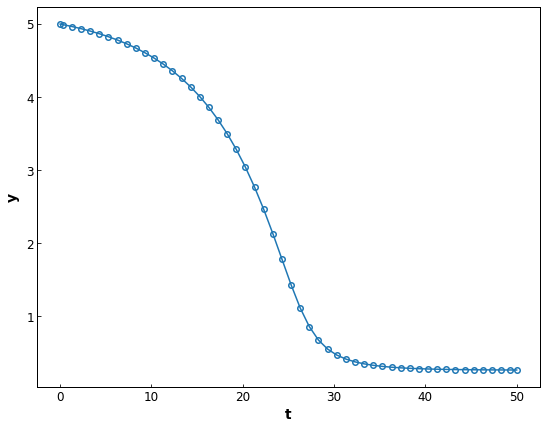

In [5]:
# Plot solution
fig, ax = plt.subplots(1,1,figsize=(9,7))

ax.plot(t, y[0,:], '-o', linewidth=1.5, mfc='none', ms=5.5, mew=1.5)

# Set axes labels
ax.set_xlabel(r'$t$')
ax.set_ylabel(r'$y$')

plt.show()